# TAREA FINAL: Datos de vivienda

## Adrián González Retamosa

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## 1. Inicializar y cargar el contexto spark

In [2]:
#Cargamos spark
from pyspark import SparkContext
sc = SparkContext()

In [3]:
# Cargamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Cargamos los datos
df = sc.textFile("BDpracticafinalCSV.csv")

In [5]:
# Vemos como se presentan para el parseado
df.take(2)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000']

Quitamos la cabecera a nuestros datos para trabajar de forma mas comoda y realizamos el parseado

In [6]:
datos_c = df.first() # guardamos solo la cabecera
datos_p = sc.parallelize([datos_c]) # hacemos la funcion con el objeto de la cabecera creado
datos = df.subtract(datos_p) # eliminamos la cabecera

In [7]:
# Sin cabecera
datos.take(1)

['18;RL;88;11394;Lvl;Gtl;9;2010;2010;Stone;Gd;TA;1856;Ex;Y;1;1;1;1;Ex;8;3;834;TA;0;Sp;6;2010;394432']

In [8]:
# Separamos por ;
datos = datos.map(lambda x: x.split(';'))

In [9]:
datos.take(1)

[['18',
  'RL',
  '88',
  '11394',
  'Lvl',
  'Gtl',
  '9',
  '2010',
  '2010',
  'Stone',
  'Gd',
  'TA',
  '1856',
  'Ex',
  'Y',
  '1',
  '1',
  '1',
  '1',
  'Ex',
  '8',
  '3',
  '834',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '394432']]

Como se nos indica en las instrucciones de la tarea solo trabajaremos con los viviendas de zona residencial, ya sean de alta, media o baja densidad. Por lo que solo nos quedaremos con las observaciones que tengan en la columna MS Zoning los valores RH, RL y RM, como nos indica el diccionario de los datos

In [10]:
datos.map(lambda x: x[1]).distinct().take(9)

['C', 'Rl', 'FV', 'A', 'rL', 'RM', 'RL', 'RH', 'I']

In [11]:
residencial = datos.filter(lambda x: (x[1] == 'RH' or x[1] == 'RL' or x[1] == 'RM'))

In [12]:
# Como observamos ya solo trabajremos con este tipo de vivienda
residencial.map(lambda x: x[1]).distinct().take(3)

['RM', 'RL', 'RH']

In [13]:
# Comprobamos la estructura de nuestro datos antes de empezar la practica
residencial.take(1)

[['18',
  'RL',
  '88',
  '11394',
  'Lvl',
  'Gtl',
  '9',
  '2010',
  '2010',
  'Stone',
  'Gd',
  'TA',
  '1856',
  'Ex',
  'Y',
  '1',
  '1',
  '1',
  '1',
  'Ex',
  '8',
  '3',
  '834',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '394432']]

## 2. Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

In [14]:
n_casas = residencial.map(lambda x: x[0]).distinct().count()
print(f'El numero de viviendas distintas es de {n_casas}')
n_observaciones = residencial.map(lambda x: x[0]).count()
print(f'El numero de observaciones es de {n_observaciones}')
print(f'El numero de viviendas repetidas es de {n_observaciones - n_casas}')

El numero de viviendas distintas es de 2758
El numero de observaciones es de 2760
El numero de viviendas repetidas es de 2


Vemos que hay 2 observaciones repetidas. Si es posible que haya identificadores duplicados ya que una misma vivienda se ha podido vender en mas de una ocasion. Con las 2 observaciones repetidas podriamos quedarnos solo con las mas actuales, es decir, con la ultima transiccion que han tenido.

## 3. ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Para este ejercicio utilizaremos la funcion 'combineByKey' para ir contando el numero de inmuebles que hay de cada tipo de vivienda residencial, asi como la suma de sus precios. En un paso posterior dividiremos estos dos valores para obtener la media del precio por zona.

In [15]:
tipo_residencial= residencial.map(lambda x: (x[1], float(x[-1]))).combineByKey( # cojo las filas de la zona y del indice
    (lambda x: (x, 1)), # coge la fila de los zonas y añade 1 cada vez que sale ese zona
    (lambda y, h: (y[0]+h, y[1]+1)), # Va sumando los valores por la key 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) # suma el total 

tipo_residencial.collectAsMap() # esto es la suma total y las veces que aparece cada zona, ahora necesitamos calcular las medias

{'RM': (58573004.0, 462), 'RL': (434060331.0, 2271), 'RH': (3683334.0, 27)}

In [16]:
# Calculamos la media
tipo_residencial = tipo_residencial.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3), x[1][1]))

In [17]:
tipo_residencial.take(3) # aqui vemos el la media del precio y el total de inmuebles para cada tipo
# la relacion con la densidad y el precio es positiva, a mas densidad mas precio, oferta y demanda. 
# Tambien comprobamos que la mayoria de los pisos es de intensidad baja

[('RM', 126781.394, 462), ('RL', 191131.806, 2271), ('RH', 136419.778, 27)]

## 4. Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## 4.1 ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

En este ejercicio tendremos que ver cuales son los años que estamos analizando para diferenciar por decada. Para ello generaremos una funcion que vaya distinguiendo.

In [18]:
# Vemos que años estan en nuestros datos
print(residencial.map(lambda x: x[7]).max()) # el piso mas nuevo es del 2010
print(residencial.map(lambda x: x[7]).min()) # el piso mas viejo es del 1872
# Por lo que dividiremos por decada desde el 1872

2010
1872


In [19]:
# Creamos la funcion
def decada(x):
  if x < 1880:
    return ('1870s')
  elif x < 1890:
    return ('1880s')
  elif x < 1900 :
    return ('1890s')
  elif x < 1910 :
    return ('1900s')
  elif x < 1920 :
    return ('1910s')
  elif x < 1930 :
    return ('1920s')
  elif x < 1940 :
    return ('1930s')
  elif x < 1950 :
    return ('1940s')
  elif x < 1960 :
    return ('1950s')
  elif x < 1970 :
    return ('1960s')
  elif x < 1980 :
    return ('1970s')
  elif x < 1990 :
    return ('1980s')
  elif x < 2000 :
    return ('1990s')
  else:
    return ('2000s')

Recordar que necesitamos saber la superficie del sotano en pies cuadrados, por lo que cogeremos la columna transformada de años mas esta



In [20]:
# Aplicamos esta funcion a la columna de fecha de cosntruccion para poder agrupar con posterioridad
decadas_sotano = residencial.map(lambda x: (int(x[7]), float(x[12]), decada(int(x[7]))))
# Solo nos quedamos con la columna de la decada y de los pies cuadrados de sotano
decadas_sotano = decadas_sotano.map(lambda x: (x[2], x[1]))
decadas_sotano.take(4)

[('2000s', 1856.0), ('1970s', 1542.0), ('1970s', 882.0), ('1970s', 525.0)]

Al igual que en el ejercico pasado utilizaremos la funcion 'combineByKey' para poder calcular la media de la superficie

In [21]:
media_decada_sup = decadas_sotano.combineByKey(
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1])))  
# En este paso calculamos ya la media (dividiendo la suma y el total de apariciones) y ordenamos por decada
media_decada_sup = media_decada_sup.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_decada_sup.sortBy(lambda x: x[0]).take(14)

[('1870s', 761.0),
 ('1880s', 836.0),
 ('1890s', 885.583),
 ('1900s', 720.139),
 ('1910s', 788.301),
 ('1920s', 833.937),
 ('1930s', 769.916),
 ('1940s', 706.926),
 ('1950s', 968.296),
 ('1960s', 1082.672),
 ('1970s', 953.918),
 ('1980s', 1086.0),
 ('1990s', 1138.105),
 ('2000s', 1347.74)]

Observamos que, en lineas generales, en cada decada la superficie del sotano aumenta

* En este ejercicio tambien se nos pide que digamos que decada es la que mejor calidad presenta en la calefaccion. Para ello craremos una escala del 0 al 4, en nivel, para despues calcular la media de cada decada.
* Por lo que la decada con un numero mayor en media es la que mejor calefaccion present


In [22]:
# Vemos cuales son los tipos de categoria de calefaccion
residencial.map(lambda x: x[13]).distinct().take(6) 

['Fa', 'TA', 'Po', 'Gd', 'Ex']

In [23]:
# Creamos la funcion
def calef(x):
  if x == 'Ex':
    return 4
  elif x == 'Gd':
    return 3
  elif x == 'TA':
    return 2
  elif x == 'Fa' :
    return 1
  else:
    return 0

In [24]:
# Aplicamos esta funcion a la columna de fecha de cosntruccion para poder agrupar con posterioridad
decadas_c = residencial.map(lambda x: (int(x[7]), x[13], decada(int(x[7])), calef(x[13]))).map(lambda y: (y[2], int(y[3])))
# Quitamos la columna de años y tipo de calefaccion
decadas_c.take(2) # 4 seria excelente y 2 Justo

[('2000s', 4), ('1970s', 2)]

In [25]:
# Hacemos, otra vez, el combineByKey para calcular la suma y luego poder dividir entre el numero de observaciones
s_decadas_c = decadas_c.combineByKey(
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1])))  
# Como antes imprimimos primer la suma total de superficie por decada y el numero de veces que sale cada decada
m_decadas_c = s_decadas_c.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
m_decadas_c.sortBy(lambda x: x[0], False).take(1)
# Como es normal, la decada mas actual de construccion es la que en media mejor calefaccion presenta

[('2000s', 3.962)]

La mejor seria la decada de los 2000, ya que en media tienen una calefaccion casi excelente

## 5. ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

+ En este ejercicio nos quedaremos solo con los pisos que se vendieron en el 2009.
+ Convertiremos la columna de superfice de la casa a m2 ( m2 = 10,76 pies). dividiremos esa columna por ese valor 
+ Ordenaremos para coger solo las 10 mayores

In [26]:
# Nos quedamos solo con los pisos de venta en 2009, de las columna de superfice, precio e ID
año2009 = residencial.map(lambda x: (x[0], int(x[-2]), (float(x[3])/10.76), float(x[-1]))).filter(lambda y: y[1] == 2009)
año2009.take(2)

[('391', 2009, 942.3791821561339, 165000.0),
 ('409', 2009, 457.9925650557621, 143750.0)]

In [27]:
# Ahora calcularemos el precio por m2 para cada id
# Primero convertimo a m2, dividiendo el valor en pies por 10.76, y despues ordenamos para ver cual es el mas caro
precio_m2 = año2009.map(lambda x: (x[0], round(float(x[3]/x[2]),2))).sortBy(lambda y: y[1], False)
precio_m2.take(10)

[('936', 1026.34),
 ('934', 990.67),
 ('464', 820.76),
 ('935', 807.67),
 ('408', 765.37),
 ('407', 755.76),
 ('405', 717.33),
 ('933', 714.02),
 ('403', 710.93),
 ('411', 700.82)]

Estos serian los ID con precio por m2 mas caro. el mas caro seria el '936' con un valor de 1026 dolares por metro cuadrado

## 6. Media anual por zonas del precio de venta y metros cuadrados.

Se nos pide encontrar el precio medio por zona en cada año, a la vez que el numero medio de m2 para cada una de ella.

Este ejercicio le plantearemos de la siguiente forma:
+ Haremos 3 divisones de piso, una por cada densidad de la zona residencial 
+ Calcularemos para cada zona el precio medio en cada uno de los años de venta
+ Calcularemos los m2 cuadrados medio que tenia cada piso, de cada zona, que se vendio


ALTA

Media de precio por año en la zona de intensidad alta

In [28]:
alta_p = residencial.map(lambda x: (x[1], int(x[-2]), float(x[-1]))).filter(lambda y: y[0] == 'RH')
precio_alta_año= alta_p.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_alta_año = precio_alta_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_alta_año.sortBy(lambda x: x[1], False).take(5)
# El años que mas caro se vendieron los pisos, en media, fue en 2008, para densidad alta

[(2008, 150333.333),
 (2007, 147250.0),
 (2006, 140316.667),
 (2010, 126280.0),
 (2009, 116206.8)]

Media de metros cuadrados de los pisos vendidos en cada año para la intensidad alta

In [29]:
alta_s = residencial.map(lambda x: (x[1], int(x[-2]), (float(x[3])/10.76))).filter(lambda y: y[0] == 'RH')
m2_alta_año= alta_s.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_alta_año_m2 = m2_alta_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_alta_año_m2.sortBy(lambda x: x[1], False).take(5)
# En media los pisos mas grandes de intensidad alta se vendieron en 2008

[(2008, 766.419),
 (2010, 753.309),
 (2006, 659.805),
 (2007, 651.557),
 (2009, 647.379)]

MEDIA

Media de precio por año en la zona de intensidad media

In [30]:
media_p = residencial.map(lambda x: (x[1], int(x[-2]), float(x[-1]))).filter(lambda y: y[0] == 'RM')
precio_media_año= media_p.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_media_año = precio_media_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_media_año.sortBy(lambda x: x[1], False).take(5)
# mas caro en 2008

[(2008, 133336.122),
 (2007, 128947.621),
 (2006, 127502.637),
 (2010, 119681.707),
 (2009, 118759.869)]

Media de metros cuadrados de los pisos vendidos en cada año para la intensidad media

In [31]:
media_s = residencial.map(lambda x: (x[1], int(x[-2]), (float(x[3])/10.76))).filter(lambda y: y[0] == 'RM')
m2_media_año= media_s.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_media_año_m2 = m2_media_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_media_año_m2.sortBy(lambda x: x[1], False).take(5)
# Mas grande en 2007

[(2007, 625.676),
 (2008, 623.896),
 (2010, 586.317),
 (2006, 575.223),
 (2009, 552.757)]

BAJA

Media de precio por año en la zona de intensidad baja

In [32]:
baja_p = residencial.map(lambda x: (x[1], int(x[-2]), float(x[-1]))).filter(lambda y: y[0] == 'RL')
precio_baja_año= baja_p.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_baja_año = precio_baja_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_baja_año.sortBy(lambda x: x[1], False).take(5)
#mas caro en 2006

[(2006, 193654.148),
 (2007, 193399.98),
 (2009, 190455.551),
 (2008, 189885.585),
 (2010, 184978.419)]

Media de metros cuadrados de los pisos vendidos en cada año para la intensidad baja

In [33]:
baja_s = residencial.map(lambda x: (x[1], int(x[-2]), (float(x[3])/10.76))).filter(lambda y: y[0] == 'RL')
m2_baja_año= baja_s.map(lambda x: (x[1], x[2])).combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
media_baja_año_m2 = m2_baja_año.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
media_baja_año_m2.sortBy(lambda x: x[1], False).take(5)
# Mas grande en 2007

[(2007, 1060.064),
 (2008, 1048.035),
 (2006, 1043.194),
 (2010, 1011.727),
 (2009, 1002.549)]

La pricipal conclusion que saco de este apartado es que los pisos son mucho mas grandes en las zonas de intensidad baja

## 7. ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Vamos a entender la recaudacion como el precio, por lo que compararemos las casas de piedra y las de ladrillo para conocer su precio medio, y si cuanto dista este


In [34]:
# Vemos primero los tipos de material para hacer la casa
residencial.map(lambda x: x[9]).distinct().take(5) 
# solo compararemos 'BrkCmn' (ladrillo) y 'BrkCmn' (piedra)

['None', '', 'BrkCmn', 'CBlock', 'Stone']

In [35]:
recaudacion_ladrillo = residencial.filter(lambda x: x[9] == 'BrkCmn').map(lambda y: float(y[-1])).collect()
print(f'La recaudacion total de los pisos de ladrillo es de {pd.Series(recaudacion_ladrillo).sum()} dolares')
recaudacion_piedra = residencial.filter(lambda x: x[9] == 'Stone').map(lambda y: float(y[-1])).collect()
print(f'La recaudacion total de los pisos de piedra es de {pd.Series(recaudacion_piedra).sum()} dolares')

La recaudacion total de los pisos de ladrillo es de 3504975.0 dolares
La recaudacion total de los pisos de piedra es de 59855477.0 dolares


In [36]:
tipo_casa = residencial.filter(lambda x: (x[9] == 'BrkCmn' or x[9] == 'Stone')).map(lambda y: (y[9], float(y[-1])))
recaudacion = tipo_casa.combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
recaudacion.take(2)

[('BrkCmn', (3504975.0, 25)), ('Stone', (59855477.0, 228))]

+ Henos sacado de dos formas la recaudacion, la segunda mas completa ya que tambien vemos cuantas se han vendido de cada tipo
+ Vemos que la recaudacion es de 17 veces mas en los pisos de piedra. Es cierto que hay muchas mas ventas de pisos de piedra

A continuacion calculamos el precio medio de la casa para cada tipo de construccion

In [37]:
ladrillo = residencial.map(lambda x: (x[9], float(x[-1]))).filter(lambda y: y[0] == 'BrkCmn')
ladrillo_c = ladrillo.combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
ladrillo_m = ladrillo_c.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
ladrillo_m.take(1)

[('BrkCmn', 140199.0)]

In [38]:
# igual para la piedra
piedra = residencial.map(lambda x: (x[9], float(x[-1]))).filter(lambda y: y[0] == 'Stone')
piedra_c = piedra.combineByKey( 
    (lambda x: (x, 1)), 
    (lambda y, h: (y[0]+h, y[1]+1)), 
    (lambda z, j: (z[0]+j[0], z[1]+j[1]))) 
piedra_m = piedra_c.map(lambda x: (x[0], round(x[1][0]/x[1][1], 3)))
piedra_m.take(1)

[('Stone', 262524.022)]

Vemos que es casi el doble el precio de los pisos de piedra

## 8. ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

In [39]:
# Despues de obtener diferentes errores vemos que la variable numero de garajes presenta un valor vacio por lo que lo eliminamos
residencial.map(lambda x: x[21]).distinct().take(7)

['4', '', '3', '0', '2', '1', '5']

In [40]:
residencial = residencial.filter(lambda x: x[21] != '')

* 2 cocinas y 2 o mas plazas de garajes

In [41]:
# Primero sacamos la media 
ricos = residencial.filter(lambda x: (int(x[18]) == 2 and int(x[21]) >= 2)).map(lambda y: float(y[-1]))
print(f'El precio medio de los pisos de estas caracteristicas es de  {round(ricos.mean(), 3)} dolares')

El precio medio de los pisos de estas caracteristicas es de  145124.279 dolares


In [42]:
# Estos serian los cuatiles para los pisos de dos cocinas y 2 o mas plazas de garaje
ricos_l = ricos.collect()
ricos_l = pd.Series(ricos_l)
ricos_l.quantile([0.25,0.5,0.75,0.99])

0.25    118973.0
0.50    141800.0
0.75    158500.0
0.99    269500.0
dtype: float64

* 1 cocinas y 1 plaza de garajes

In [43]:
# Primero sacamos la media 
pobres = residencial.filter(lambda x: (int(x[18]) == 1 and int(x[21]) == 1)).map(lambda y: float(y[-1]))
print(f'El precio medio de los pisos de estas caracteristicas es de  {round(pobres.mean(), 3)} dolares')

El precio medio de los pisos de estas caracteristicas es de  128121.993 dolares


In [44]:
pobres_l = pobres.collect()
pobres_l = pd.Series(pobres_l)
pobres_l.quantile([0.25,0.5,0.75,0.99])

0.25    111625.0
0.50    128000.0
0.75    142062.5
0.99    232380.0
dtype: float64

In [45]:
f'Observamos que en media los pisos de 2 cocinas y 2 o mas plazas de garaje son {round(ricos.mean()/pobres.mean(), 3)} mas caros'

'Observamos que en media los pisos de 2 cocinas y 2 o mas plazas de garaje son 1.133 mas caros'

## 9. (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Para este ejercicio realizaremos un grafico de dispersion y calcularemos el coeficiente de correlacion de pearson


In [46]:
Garaje = residencial.map(lambda x: int(x[21])).collect()
Precio = residencial.map(lambda x: float(x[-1])).collect()

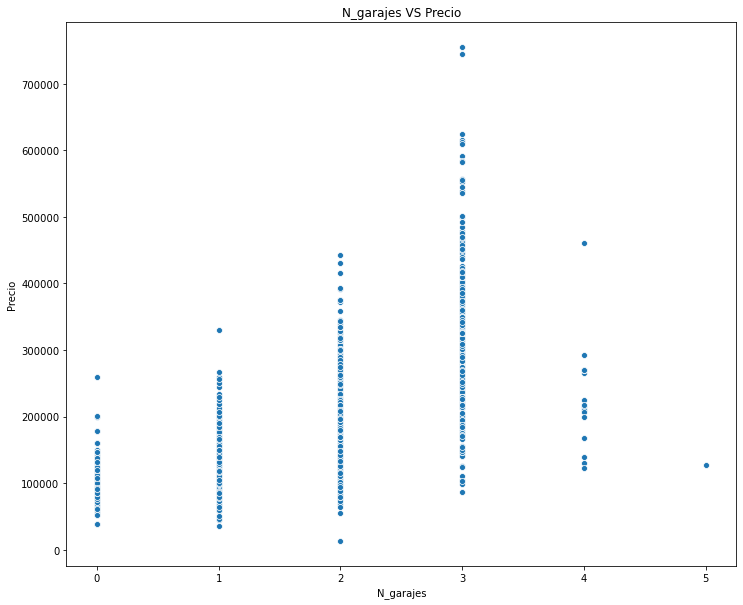

In [47]:
plt.figure(figsize = (12, 10))
sns.scatterplot(Garaje, Precio)
plt.title('N_garajes VS Precio')
plt.xlabel('N_garajes')
plt.ylabel('Precio');

In [48]:
# Matriz de correlacion
np.corrcoef(Garaje, Precio)

array([[1.        , 0.64457463],
       [0.64457463, 1.        ]])

+ Observamos que la relacion podria ser cuadratica, ya que gast 3 plazas de garaje el precio aumenta con esta pero despues sisminuye.
+ La corrlacion es de 0.64

## 10. (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

Este ejercicio le vamos a orientar de la siguiente forma:


+ Solo nos quedaremos con los pisos de excelentes condiciones en alguna de las siguientes condicones: en materiales, en sotano, calefaccion, con aire acondicionado, garaje y piscina.
+ Y seleccionaremos aquellos con memenor precio por m2

In [49]:
excelente = residencial.filter(lambda x: (int(x[6]) >= 8 or x[11] == 'Ex' or x[13] == 'Ex' or x[14] == 'Y' or x[19] == 'Ex' or x[25] == 'Ex'))

In [50]:
c_m2 = excelente.map(lambda x: (x[0], (float(x[-1])/(float(x[3])/10.76))))
c_m2.sortBy(lambda x: x[1]).take(5)

[('1571', 14.961144175877564),
 ('2116', 18.74540880503145),
 ('957', 18.746080048317033),
 ('1499', 26.94757931973641),
 ('2072', 28.220132176571223)]

Estos serian los 5 pisos con mejor precio por m2 segun nuestras condicones